# Customer Sign-Up Behavior & Data Quality Audit
## Rapid Scale SaaS Company - Business Intelligence Analysis

---

### Project Overview
This notebook performs a comprehensive data quality audit and customer sign-up behavior analysis for **Rapid Scale**, a fast-growing SaaS company. This analysis supports the Monthly Business Review (MBR) by providing actionable insights to optimize marketing campaigns and user engagement workflows.

### Objectives
- **Data Quality Assessment**: Identify and resolve missing, inaccurate, or incomplete data
- **Customer Acquisition Analysis**: Understand how users discover and sign up for services
- **Subscription Behavior**: Analyze plan selection patterns across demographics
- **Marketing Engagement**: Evaluate opt-in behavior and preferences
- **Business Insights**: Answer key questions to drive strategic decisions

### Dataset Information
- **Primary File**: `customer_signups.csv`
- **Key Variables**: customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender
- **Expected Challenges**: Missing values, inconsistent formatting, duplicate records

### Analysis Structure
1. **Data Loading & Exploration**
2. **Data Cleaning & Standardization**
3. **Data Quality Summary**
4. **Customer Acquisition Analysis**
5. **Business Question Investigation**
6. **Insights & Recommendations**

### Target Audience
Marketing and Onboarding teams seeking data-driven insights to improve campaign effectiveness and user engagement strategies.

---
*Analysis Date: [10 July 2025] | Analyst: [Ujwal Neethipudi]*

In [49]:
# Install necessary libraries
%pip install -q pandas matplotlib seaborn numpy
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Load the dataset
df = pd.read_csv('customer_signups.csv')

In [51]:
# Initial dataset exploration
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset shape: (300, 10)

Column names:
['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender']

Data types:
customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object

First few rows:


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [52]:
# Check for missing values
print("Missing values per column:")
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})
print(missing_summary)

Missing values per column:
                  Missing Count  Missing Percentage
customer_id                   2            0.666667
name                          9            3.000000
email                        34           11.333333
signup_date                   2            0.666667
source                        9            3.000000
region                       30           10.000000
plan_selected                 8            2.666667
marketing_opt_in             10            3.333333
age                          12            4.000000
gender                        8            2.666667


In [53]:
# Check for duplicate rows based on customer_id
duplicate_count = df[df.duplicated(['customer_id'])]
print(f"\nNumber of duplicate rows based on customer_id: {len(duplicate_count)}")


Number of duplicate rows based on customer_id: 1


In [54]:
# Remove duplicates based on customer_id
print(f"length of dataset before removing duplicates: {len(df)}")
df = df.drop_duplicates(subset=['customer_id'])
print(f"length of dataset after removing duplicates: {len(df)}")

length of dataset before removing duplicates: 300
length of dataset after removing duplicates: 299


In [55]:
# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['source', 'region', 'plan_selected', 'marketing_opt_in', 'gender']:
    if col in df.columns:
        print(f"\n{col}: {df[col].value_counts()}")


Unique values in categorical columns:

source: source
YouTube      58
Google       50
Referral     49
Instagram    48
Facebook     40
LinkedIn     39
??            6
Name: count, dtype: int64

region: region
North      65
East       61
South      59
West       45
Central    39
Name: count, dtype: int64

plan_selected: plan_selected
Premium        57
Pro            53
basic          46
Basic          46
PREMIUM        42
PRO            41
UnknownPlan     6
Name: count, dtype: int64

marketing_opt_in: marketing_opt_in
No     156
Yes    132
Nil      1
Name: count, dtype: int64

gender: gender
Other         59
FEMALE        51
male          48
Male          44
Non-Binary    42
Female        41
123            6
Name: count, dtype: int64


* Observations after looking at the datatype of the columns, missing values and inconsistent formatting in some columns
* We should standardize the missing value across the dataset to have NaN instead of Nil,??, etc.
* We should standardize entries in gender and plan_selected to be categorically uniform
* signup_date should be changed to datetime format instead of strings
* age should be in a numeric format instead of strings

In [56]:
# Standardize and impute missing values in 'source' column
# Replacing '??' in 'source' column with 'Unknown'
if 'source' in df.columns:
    df['source'] = df['source'].replace('??', 'Unknown')
    print("\nReplaced '??' in 'source' with 'Unknown'.")

# Check value counts for 'source' after replacement
if 'source' in df.columns:
    print("\nValue counts for 'source' after replacement:")
    print(df['source'].value_counts())

# Missing values in 'source' column
if 'source' in df.columns:
    print("\nMissing values in 'source':")
    print(df['source'].isnull().sum())

# Impute missing values in 'source' with 'Unknown'
if 'source' in df.columns:
    df['source'] = df['source'].fillna('Unknown')
    print("\nImputed missing values in 'source' with 'Unknown'.")

# Check value counts for 'source' after imputation
if 'source' in df.columns:
    print("\nValue counts for 'source' after imputation:")
    print(df['source'].value_counts())


Replaced '??' in 'source' with 'Unknown'.

Value counts for 'source' after replacement:
source
YouTube      58
Google       50
Referral     49
Instagram    48
Facebook     40
LinkedIn     39
Unknown       6
Name: count, dtype: int64

Missing values in 'source':
9

Imputed missing values in 'source' with 'Unknown'.

Value counts for 'source' after imputation:
source
YouTube      58
Google       50
Referral     49
Instagram    48
Facebook     40
LinkedIn     39
Unknown      15
Name: count, dtype: int64


In [57]:
# Standardize values in plan_selected
# Convert to title case, then handle special cases
df['plan_selected'] = df['plan_selected'].str.title()
# This converts: basic→Basic, PRO→Pro, PREMIUM→Premium, UnknownPlan→Unknownplan
# Fix the unknown plan
df['plan_selected'] = df['plan_selected'].replace('Unknownplan', 'Unknown')
# Check unique values in plan_selected after standardization
if 'plan_selected' in df.columns:
    print("\nUnique values in 'plan_selected' after standardization:")
    print(df['plan_selected'].value_counts())

# Impute missing values in 'plan_selected' with 'Unknown'
if 'plan_selected' in df.columns:
    df['plan_selected'] = df['plan_selected'].fillna('Unknown')
    print("\nImputed missing values in 'plan_selected' with 'Unknown'.")
# Check value counts for 'plan_selected' after imputation
if 'plan_selected' in df.columns:
    print("\nValue counts for 'plan_selected' after imputation:")
    print(df['plan_selected'].value_counts())




Unique values in 'plan_selected' after standardization:
plan_selected
Premium    99
Pro        94
Basic      92
Unknown     6
Name: count, dtype: int64

Imputed missing values in 'plan_selected' with 'Unknown'.

Value counts for 'plan_selected' after imputation:
plan_selected
Premium    99
Pro        94
Basic      92
Unknown    14
Name: count, dtype: int64


In [58]:
# Standardize and impute missing values in region column
if 'region' in df.columns:
    # Impute missing values with 'Unknown'
    df['region'] = df['region'].fillna('Unknown')
    print("\nImputed missing values in 'region' with 'Unknown'.")
    # Check value counts for 'region' after imputation
    print("\nValue counts for 'region' after imputation:")
    print(df['region'].value_counts())


Imputed missing values in 'region' with 'Unknown'.

Value counts for 'region' after imputation:
region
North      65
East       61
South      59
West       45
Central    39
Unknown    30
Name: count, dtype: int64


In [59]:
# standardize gender column
# check unique values in 'gender' column

print("\nUnique values in 'gender' column before standardization:")
print(df['gender'].value_counts(dropna=False))

# Convert to title case
df['gender'] = df['gender'].str.title()

# Replace '123' with 'NaN'
df['gender'] = df['gender'].replace('123', pd.NA)

# Replace 'NaN' with pd.NA
df['gender'] = df['gender'].replace(np.nan, pd.NA)
# Check unique values in 'gender' column after replacement
print("\nUnique values in 'gender' column after replacement:")
print(df['gender'].value_counts(dropna=False))

# Impute missing values in 'gender' column
df['gender'] = df['gender'].fillna('Unknown')
# Check value counts for 'gender' column after imputation
print("\nValue counts for 'gender' column after imputation:")
print(df['gender'].value_counts(dropna=False))


Unique values in 'gender' column before standardization:
gender
Other         59
FEMALE        51
male          48
Male          44
Non-Binary    42
Female        41
NaN            8
123            6
Name: count, dtype: int64

Unique values in 'gender' column after replacement:
gender
Female        92
Male          92
Other         59
Non-Binary    42
<NA>          14
Name: count, dtype: int64

Value counts for 'gender' column after imputation:
gender
Female        92
Male          92
Other         59
Non-Binary    42
Unknown       14
Name: count, dtype: int64


In [60]:
# standardize and impute missing values in marketing_opt_in column
# check unique values in 'marketing_opt_in' column
print("\nUnique values in 'marketing_opt_in' column before standardization:")
print(df['marketing_opt_in'].value_counts(dropna=False))
# replace NaN and Nil with 'No'
df['marketing_opt_in'] = df['marketing_opt_in'].replace([np.nan, 'Nil'], 'No')
# Check unique values in 'marketing_opt_in' column after replacement
print("\nUnique values in 'marketing_opt_in' column after replacement:")
print(df['marketing_opt_in'].value_counts(dropna=False))


Unique values in 'marketing_opt_in' column before standardization:
marketing_opt_in
No     156
Yes    132
NaN     10
Nil      1
Name: count, dtype: int64

Unique values in 'marketing_opt_in' column after replacement:
marketing_opt_in
No     167
Yes    132
Name: count, dtype: int64


In [61]:
# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['source', 'region', 'plan_selected', 'marketing_opt_in', 'gender']:
    if col in df.columns:
        print(f"\n{col}: {df[col].value_counts(dropna=False)}")


Unique values in categorical columns:

source: source
YouTube      58
Google       50
Referral     49
Instagram    48
Facebook     40
LinkedIn     39
Unknown      15
Name: count, dtype: int64

region: region
North      65
East       61
South      59
West       45
Central    39
Unknown    30
Name: count, dtype: int64

plan_selected: plan_selected
Premium    99
Pro        94
Basic      92
Unknown    14
Name: count, dtype: int64

marketing_opt_in: marketing_opt_in
No     167
Yes    132
Name: count, dtype: int64

gender: gender
Female        92
Male          92
Other         59
Non-Binary    42
Unknown       14
Name: count, dtype: int64


In [62]:
# Standardize and impute missing values in age column
# Convert age to integer, handling non-numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype(pd.Int64Dtype())
# Impute missing values in 'age' with the median age
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
# Check unique values in 'age' column after imputation
print("\nUnique values in 'age' column after imputation:")
print(df['age'].value_counts(dropna=False))
# Replace age 206 with median age
df['age'] = df['age'].replace(206, median_age)
# Check unique values in 'age' column after replacement
print("\nUnique values in 'age' column after replacing 206 with median age:")
print(df['age'].value_counts(dropna=False))



Unique values in 'age' column after imputation:
age
34     63
40     50
25     48
29     46
21     28
53     27
47     22
60     14
206     1
Name: count, dtype: Int64

Unique values in 'age' column after replacing 206 with median age:
age
34    64
40    50
25    48
29    46
21    28
53    27
47    22
60    14
Name: count, dtype: Int64


In [63]:
# Clean and standardize the signup_date column
# Convert to datetime format, handling errors
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')

/var/folders/b0/4rllfyvx2r9cy22ypw0nf3m80000gn/T/ipykernel_24542/1004726551.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')


# Summary Outputs

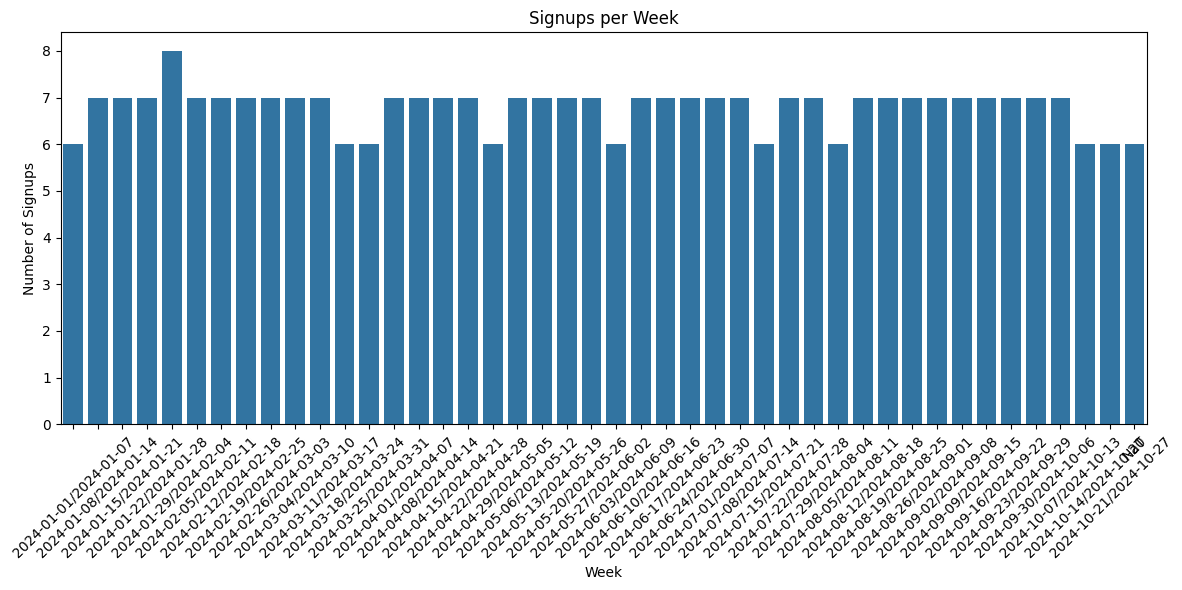

In [64]:
# Signups per week
df['signup_week'] = df['signup_date'].dt.to_period('W').astype(str)
signups_per_week = df.groupby('signup_week').size().reset_index(name='signups')
# Plotting signups per week
plt.figure(figsize=(12, 6))
sns.barplot(x='signup_week', y='signups', data=signups_per_week)
plt.xticks(rotation=45)
plt.title('Signups per Week')
plt.xlabel('Week')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

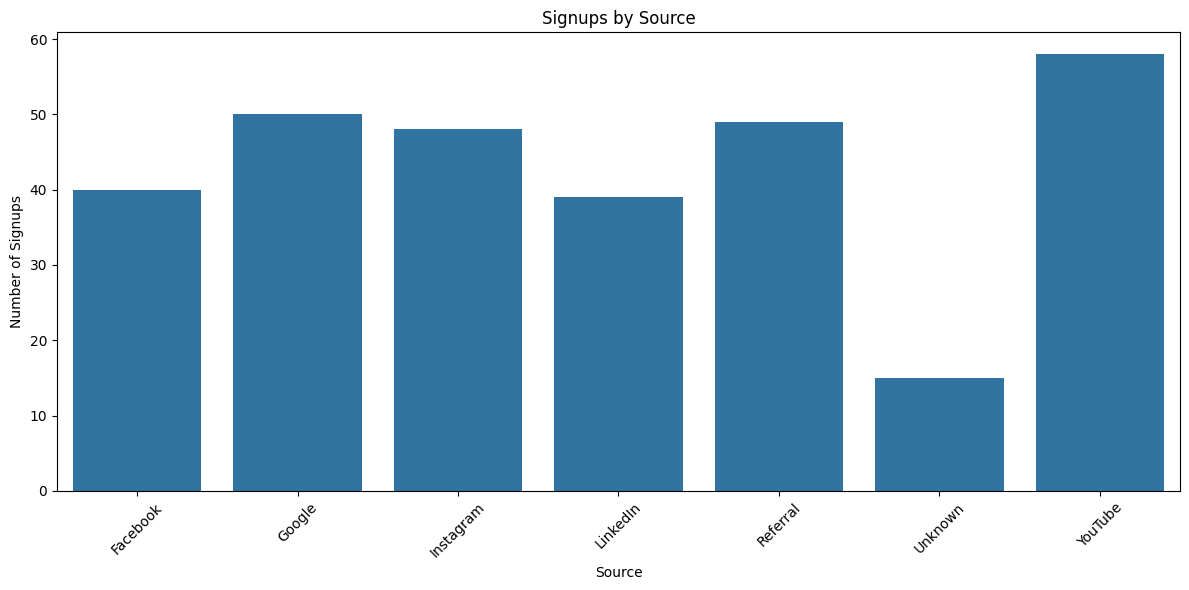

In [65]:
# signups by source using groupby
if 'source' in df.columns:
    signups_by_source = df.groupby('source').size().reset_index(name='signups')
    # Plotting signups by source
    plt.figure(figsize=(12, 6))
    sns.barplot(x='source', y='signups', data=signups_by_source)
    plt.xticks(rotation=45)
    plt.title('Signups by Source')
    plt.xlabel('Source')
    plt.ylabel('Number of Signups')
    plt.tight_layout()
    plt.show()

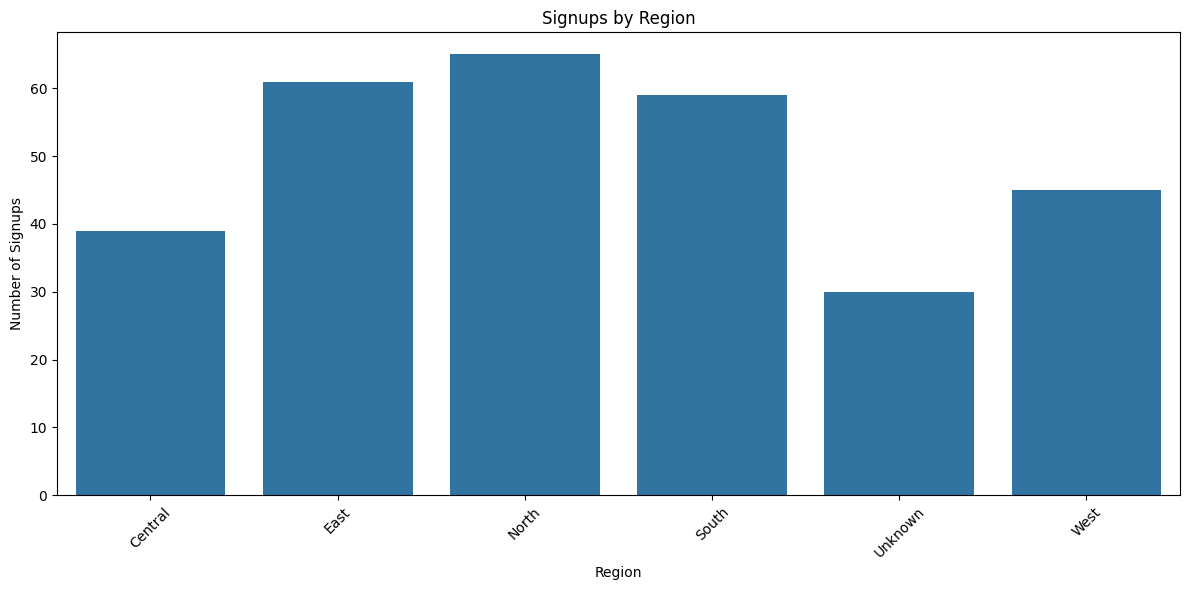

In [66]:
# signups by region using groupby
if 'region' in df.columns:
    signups_by_region = df.groupby('region').size().reset_index(name='signups')
    # Plotting signups by region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='region', y='signups', data=signups_by_region)
    plt.xticks(rotation=45)
    plt.title('Signups by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Signups')
    plt.tight_layout()
    plt.show()

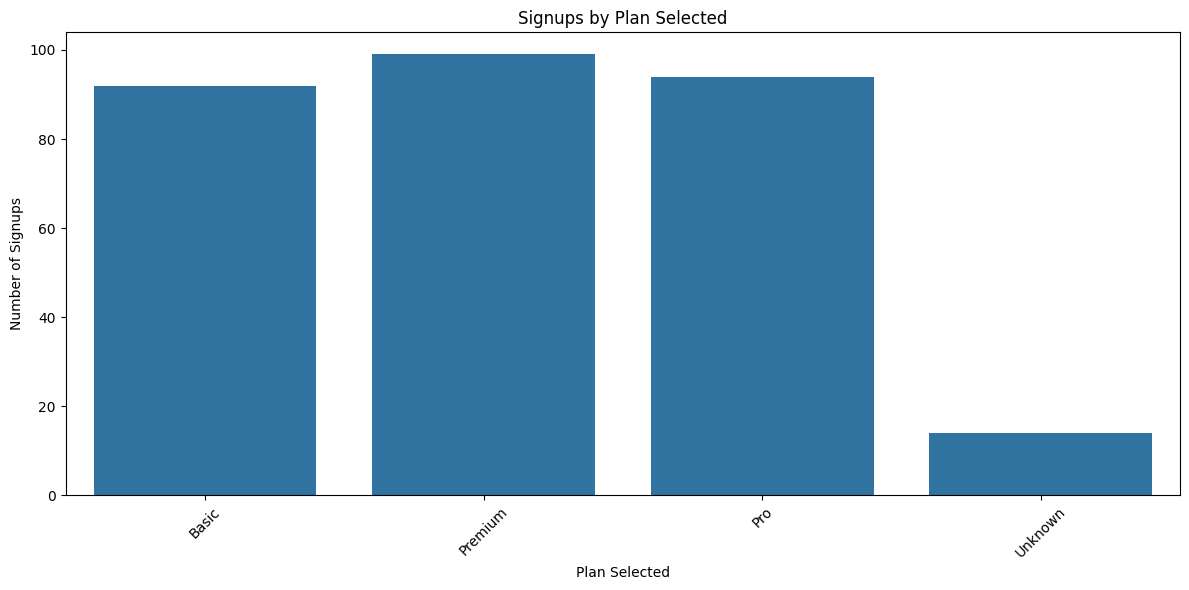

In [67]:
# signups by plan_selected using groupby
if 'plan_selected' in df.columns:
    signups_by_plan = df.groupby('plan_selected').size().reset_index(name='signups')
    # Plotting signups by plan_selected
    plt.figure(figsize=(12, 6))
    sns.barplot(x='plan_selected', y='signups', data=signups_by_plan)
    plt.xticks(rotation=45)
    plt.title('Signups by Plan Selected')
    plt.xlabel('Plan Selected')
    plt.ylabel('Number of Signups')
    plt.tight_layout()
    plt.show()

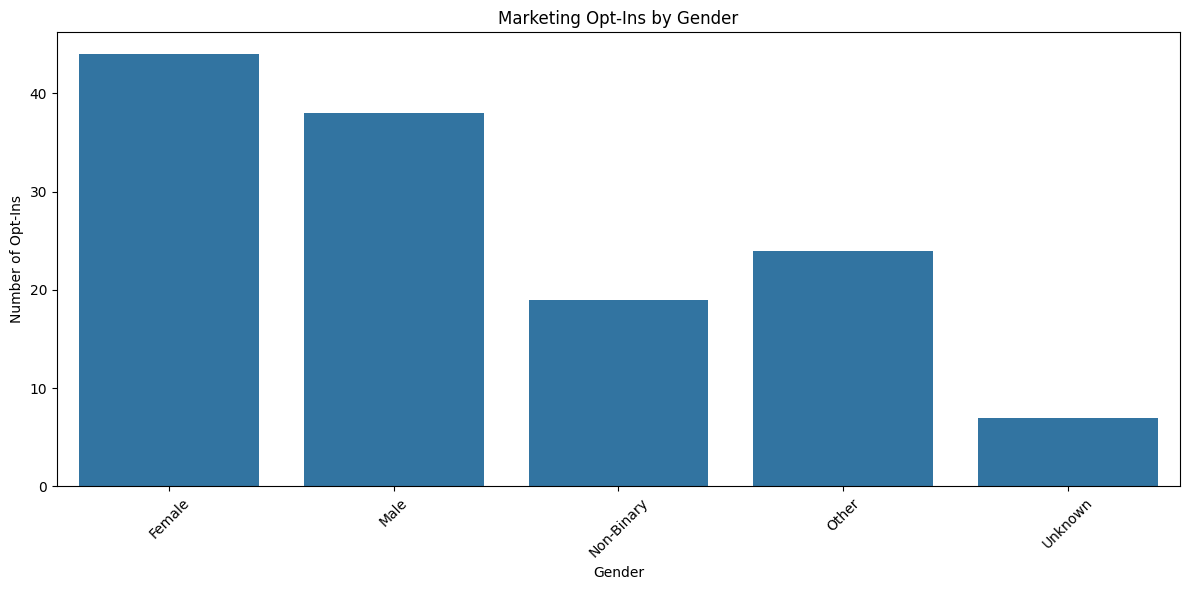

In [68]:
# Marketing opt-in counts by gender
if 'gender' in df.columns:
    marketing_opt_in_by_gender = df[df['marketing_opt_in'] == 'Yes'].groupby('gender').size().reset_index(name='opt_ins')
    # Plotting marketing opt-ins by gender
    plt.figure(figsize=(12, 6))
    sns.barplot(x='gender', y='opt_ins', data=marketing_opt_in_by_gender)
    plt.xticks(rotation=45)
    plt.title('Marketing Opt-Ins by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Opt-Ins')
    plt.tight_layout()
    plt.show()


Age column summary statistics:
count        299.0
mean     35.461538
std      10.659512
min           21.0
25%           25.0
50%           34.0
75%           40.0
max           60.0
Name: age, dtype: Float64


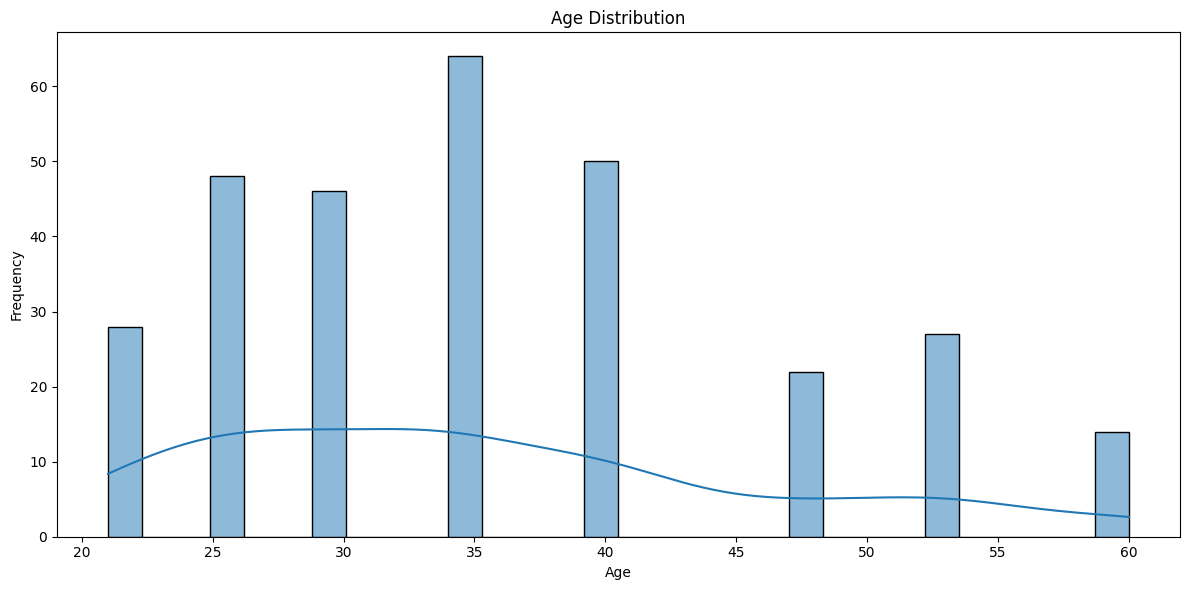

In [69]:
# Age column summary statistics
if 'age' in df.columns:
    age_summary = df['age'].describe()
    print("\nAge column summary statistics:")
    print(age_summary)

    # Plotting age distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(df['age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Business Questions

In [70]:
# Which acquisition source brought in the most users last month?
# Identify the max value of signup_date and filter for the last month
if 'signup_date' in df.columns:
    last_month = df['signup_date'].max().to_period('M')
    last_month_signups = df[df['signup_date'].dt.to_period('M') == last_month]
    
    # Group by source and count signups
    signups_by_source_last_month = last_month_signups.groupby('source').size().reset_index(name='signups')
    
    # Identify the source with the maximum signups
    max_source = signups_by_source_last_month.loc[signups_by_source_last_month['signups'].idxmax()]
    
    print(f"\nThe acquisition source that brought in the most users last month ({last_month}) is '{max_source['source']}' with {max_source['signups']} signups.")


The acquisition source that brought in the most users last month (2024-10) is 'Google' with 7 signups.


         customer_id  name  email  signup_date  source  region  plan_selected  \
region                                                                          
Central            0     0      5            0       0       0              0   
East               0     2      7            0       0       0              2   
North              0     3     10            0       4       0              3   
South              1     1      4            0       2       0              0   
West               1     3      4            1       1       0              2   

         marketing_opt_in  age  gender  
region                                  
Central                 2    2       1  
East                    3    2       3  
North                   2    3       0  
South                   2    2       1  
West                    1    2       3  


/var/folders/b0/4rllfyvx2r9cy22ypw0nf3m80000gn/T/ipykernel_24542/3133393669.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = original_df.groupby('region').apply(lambda x: x.isnull().sum())


<Figure size 1200x600 with 0 Axes>

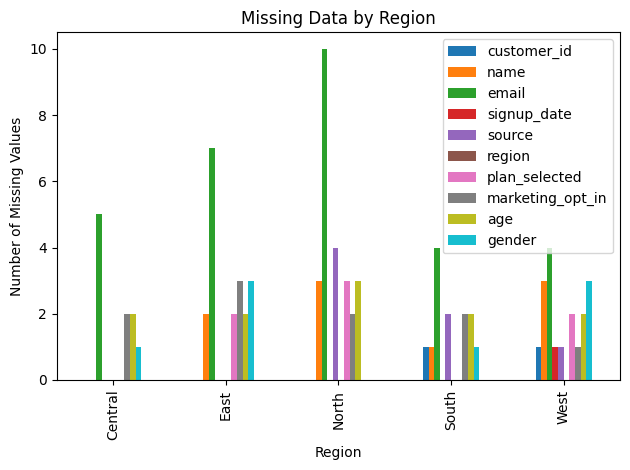

In [71]:
# Which region shows signs of missing or incomplete data?
# Read original dataset to check for missing or incomplete data and group by region
original_df = pd.read_csv('customer_signups.csv')
# Check for missing values in each column after grouping by region
missing_by_region = original_df.groupby('region').apply(lambda x: x.isnull().sum())
print(missing_by_region)

# Visualize the missing data by region
plt.figure(figsize=(12, 6))
missing_by_region.plot(kind='bar')
plt.title('Missing Data by Region')
plt.xlabel('Region')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

In [72]:
# Are older users more or less likely to opt in to marketing?
# Create binning for age groups and categorize them
# Check summary stats for the age column
df['age'].describe()

count        299.0
mean     35.461538
std      10.659512
min           21.0
25%           25.0
50%           34.0
75%           40.0
max           60.0
Name: age, dtype: Float64

In [73]:
# Say 20 to 35 is young, 36 to 50 is middle-aged, and 51+ is older
def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age <= 35:
        return 'Young'
    elif 36 <= age <= 50:
        return 'Middle-aged'
    else:
        return 'Older'
df['age_group'] = df['age'].apply(categorize_age)

<Figure size 1200x600 with 0 Axes>

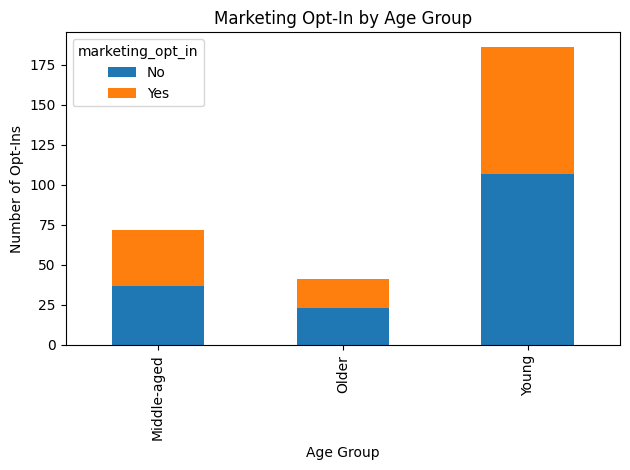

marketing_opt_in   No  Yes
age_group                 
Middle-aged        37   35
Older              23   18
Young             107   79


In [74]:
# Are older users more or less likely to opt in to marketing?
# Group by age group and marketing opt-in status
opt_in_by_age_group = df.groupby(['age_group', 'marketing_opt_in']).size().unstack(fill_value=0)
# Plotting opt-in by age group
plt.figure(figsize=(12, 6))
opt_in_by_age_group.plot(kind='bar', stacked=True)
plt.title('Marketing Opt-In by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Opt-Ins')
plt.tight_layout()
plt.show()
# Check numbers
print(opt_in_by_age_group)


<Figure size 1200x600 with 0 Axes>

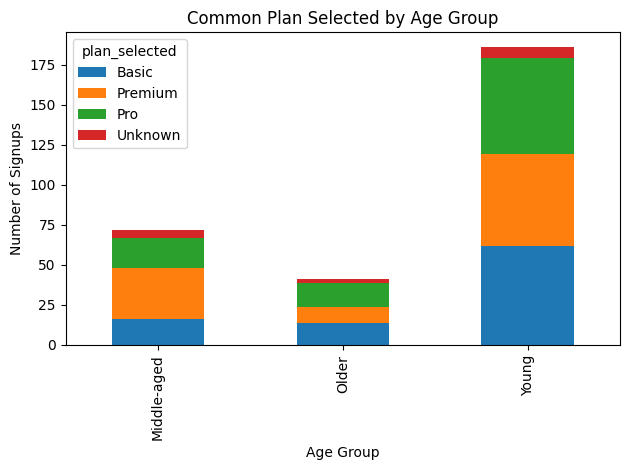

plan_selected  Basic  Premium  Pro  Unknown
age_group                                  
Middle-aged       16       32   19        5
Older             14       10   15        2
Young             62       57   60        7


In [75]:
# Which plan is most commonly selected, and by which age group?
common_plan_by_age_group = df.groupby(['age_group', 'plan_selected']).size().unstack(fill_value=0)
# Plotting common plan by age group
plt.figure(figsize=(12, 6))
common_plan_by_age_group.plot(kind='bar', stacked=True)
plt.title('Common Plan Selected by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

# Check numbers
print(common_plan_by_age_group)

We can see that the Premium plan is most commonly chosen among the plans (32+10+59). Young customers (57) most commonly chose this plan.

In [76]:
# Load the additional dataset for further analysis
additional_df = pd.read_csv('support_tickets.csv')
# Check the shape and columns of the additional dataset
print("\nAdditional dataset shape:", additional_df.shape)
print("\nAdditional dataset columns:", additional_df.columns.tolist())


Additional dataset shape: (123, 5)

Additional dataset columns: ['ticket_id', 'customer_id', 'ticket_date', 'issue_type', 'resolved']


In [77]:
# Join this dataset with the main dataset on customer_id
if 'customer_id' in df.columns and 'customer_id' in additional_df.columns:
    merged_df = pd.merge(df, additional_df, on='customer_id', how='left')
    print("\nMerged dataset shape:", merged_df.shape)
    print("\nMerged dataset columns:", merged_df.columns.tolist())


Merged dataset shape: (362, 16)

Merged dataset columns: ['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender', 'signup_week', 'age_group', 'ticket_id', 'ticket_date', 'issue_type', 'resolved']


In [78]:
# Count how many customers contacted support within 2 weeks of sign-up
merged_df['contacted_support'] = merged_df['ticket_date'].notnull()
support_within_2_weeks = merged_df[merged_df['ticket_date'] <= merged_df['signup_date'] + pd.Timedelta(weeks=2)]
num_support_contacts = support_within_2_weeks['customer_id'].nunique()
print("\nNumber of customers who contacted support within 2 weeks of sign-up:", num_support_contacts)



Number of customers who contacted support within 2 weeks of sign-up: 40


In [79]:
# Summarise support activity by plan and region (Group by plan and region)
support_summary = merged_df.groupby(['plan_selected', 'region']).agg(
    total_tickets=('ticket_id', lambda x: x.notna().sum()),
    support_resolved=('resolved', lambda x: (x == 'Yes').sum())
).reset_index()

print("\nSupport activity summary by plan and region:")
print(support_summary)


Support activity summary by plan and region:
   plan_selected   region  total_tickets  support_resolved
0          Basic  Central              2                 2
1          Basic     East             11                 8
2          Basic    North              3                 3
3          Basic    South             14                13
4          Basic  Unknown              2                 2
5          Basic     West             10                 8
6        Premium  Central              6                 5
7        Premium     East              1                 0
8        Premium    North              6                 5
9        Premium    South              2                 2
10       Premium  Unknown              0                 0
11       Premium     West             11                11
12           Pro  Central             10                 7
13           Pro     East             14                13
14           Pro    North             11                 9
15        

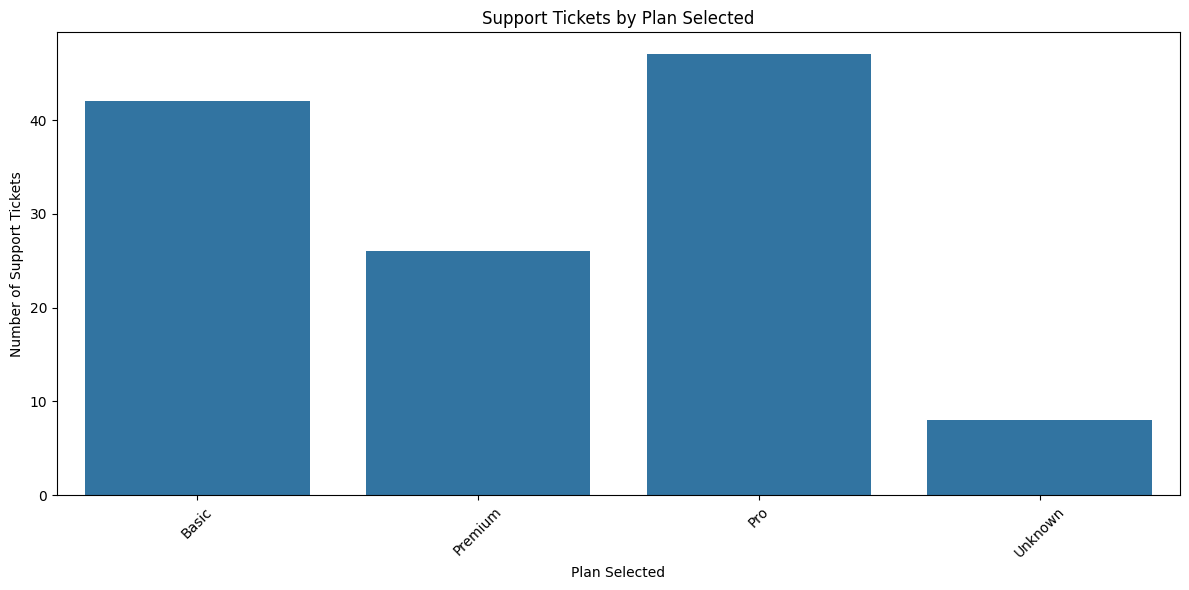


Support tickets by plan:
  plan_selected  total_tickets
0         Basic             42
1       Premium             26
2           Pro             47
3       Unknown              8


In [80]:
# Which plan’s users are most likely to contact support?
# Count support tickets by plan
support_tickets_by_plan = merged_df.groupby('plan_selected')['ticket_id'].count().reset_index(name='total_tickets')
# Plotting support tickets by plan
plt.figure(figsize=(12, 6))
sns.barplot(x='plan_selected', y='total_tickets', data=support_tickets_by_plan)
plt.xticks(rotation=45)
plt.title('Support Tickets by Plan Selected')
plt.xlabel('Plan Selected')
plt.ylabel('Number of Support Tickets')
plt.tight_layout()
plt.show()
# Check numbers
print("\nSupport tickets by plan:")
print(support_tickets_by_plan)